In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/ner.csv')

In [3]:
df.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


Exploratory Analysis

In [4]:
df.describe()

,Sentence #,Sentence,POS,Tag
count,47959,47959,47959,47959
unique,47959,47575,47214,33318
top,Sentence: 1,VOA 's Mil Arcega reports .,"['NNP', 'POS', 'NNP', 'NNP', 'VBZ', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
freq,1,17,39,450


In [5]:
df.tail(2)

,Sentence #,Sentence,POS,Tag
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
47958,Sentence: 47959,Indian forces said they responded to the attack,"['JJ', 'NNS', 'VBD', 'PRP', 'VBD', 'TO', 'DT',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47959 entries, 0 to 47958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  47959 non-null  object
 1   Sentence    47959 non-null  object
 2   POS         47959 non-null  object
 3   Tag         47959 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [7]:
df.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [8]:
maxlen = max(len(s) for s in df['Sentence'])
print(maxlen)

541


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

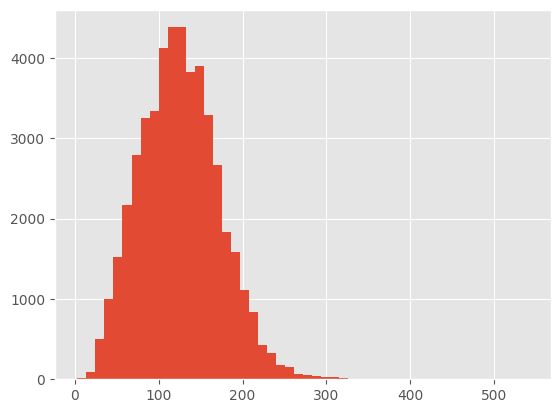

In [10]:
plt.hist([len(s) for s in df['Sentence']], bins=50)
plt.show()

Data Preprocessing

def getwords(s):
    return s.split()

In [11]:
def getwords(s):
   return s.split()

In [12]:
def gettags(s):
   return s[2:-2].split("', '")

In [13]:
def sentence2idx(s):
  s = [word2idx[w] for w in getwords(s)]
  return s

In [14]:
def tags_list2idx(t):
  t = [tag2idx[tag] for tag in gettags(t)]
  return t

In [15]:
words_list=[getwords(s) for s in df['Sentence']]
len(words_list)
print(words_list[:4])

[['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.'], ['Families', 'of', 'soldiers', 'killed', 'in', 'the', 'conflict', 'joined', 'the', 'protesters', 'who', 'carried', 'banners', 'with', 'such', 'slogans', 'as', '"', 'Bush', 'Number', 'One', 'Terrorist', '"', 'and', '"', 'Stop', 'the', 'Bombings', '.', '"'], ['They', 'marched', 'from', 'the', 'Houses', 'of', 'Parliament', 'to', 'a', 'rally', 'in', 'Hyde', 'Park', '.'], ['Police', 'put', 'the', 'number', 'of', 'marchers', 'at', '10,000', 'while', 'organizers', 'claimed', 'it', 'was', '1,00,000', '.']]


In [16]:
flatten_list = [j for sub in words_list for j in sub]
print(flatten_list[:100])

['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.', 'Families', 'of', 'soldiers', 'killed', 'in', 'the', 'conflict', 'joined', 'the', 'protesters', 'who', 'carried', 'banners', 'with', 'such', 'slogans', 'as', '"', 'Bush', 'Number', 'One', 'Terrorist', '"', 'and', '"', 'Stop', 'the', 'Bombings', '.', '"', 'They', 'marched', 'from', 'the', 'Houses', 'of', 'Parliament', 'to', 'a', 'rally', 'in', 'Hyde', 'Park', '.', 'Police', 'put', 'the', 'number', 'of', 'marchers', 'at', '10,000', 'while', 'organizers', 'claimed', 'it', 'was', '1,00,000', '.', 'The', 'protest', 'comes', 'on', 'the', 'eve', 'of', 'the', 'annual', 'conference', 'of', 'Britain', "'s", 'ruling', 'Labor', 'Party', 'in']


In [17]:
words_set = set(tuple(flatten_list))
words = list(words_set)
len(words)
print(words[:10])

['costliest', 'depots', 'taping', 'Asagoe', 'flat', 'Katsuya', 'blew', 'inadequate', 'Heights', 'Saffir-Simpson']


In [18]:
tags_list=[gettags(s) for s in df['Tag']]
print(len(tags_list))
print(tags_list[:4])

47959
[['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]


In [19]:
flatten_tags = [j for sub in tags_list for j in sub]
tags_set = set(tuple(flatten_tags))
tags = list(tags_set)
print(tags[0:20])
print(len(tags))

['B-org', 'I-nat', 'B-eve', 'B-tim', 'I-art', 'I-gpe', 'I-per', 'B-geo', 'B-gpe', 'I-eve', 'B-nat', 'B-per', 'I-geo', 'I-tim', 'B-art', 'O', 'I-org']
17


In [20]:
# No of unique words and tags in the dataset
n_words = len(words)
n_tags = len(tags)
print(n_words)
print(n_tags)

35176
17


In [21]:
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [22]:
print(word2idx['a'])
print(tag2idx['B-eve'])

21895
2


In [23]:
from keras.preprocessing.sequence import pad_sequences
X = [sentence2idx(s) for s in df['Sentence']]
print(X[:2])

[[35127, 7800, 27639, 18443, 26010, 28529, 19484, 32690, 286, 5177, 16396, 19957, 13536, 8442, 31402, 5177, 30758, 7800, 19615, 22403, 20567, 24004, 31726, 5146], [2956, 7800, 7396, 21178, 19957, 5177, 9126, 7527, 5177, 13281, 8964, 6945, 33354, 32797, 34294, 28249, 27860, 1707, 17440, 32874, 14970, 19098, 1707, 8442, 1707, 2655, 5177, 22468, 5146, 1707]]


In [24]:
Y = [tags_list2idx(t) for t in df['Tag']]
print(Y[:2])


[[15, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15, 8, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 11, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]]


In [25]:
type(tags_list)

list

In [26]:
from collections import Counter

In [27]:
from wordcloud import WordCloud

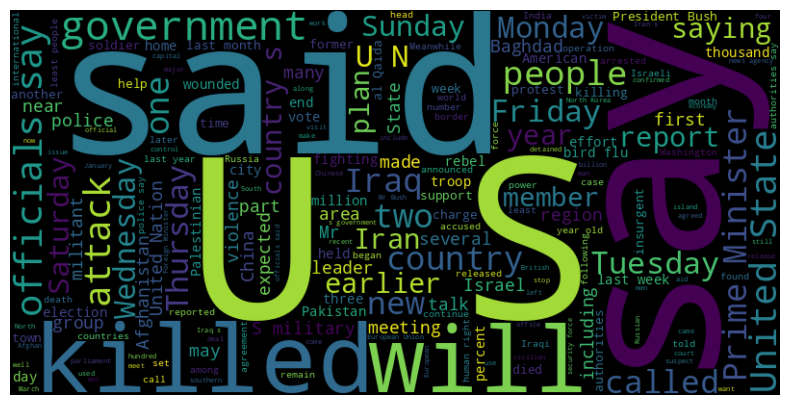

In [28]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate(''.join(df['Sentence']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
from itertools import chain
def make_dict_map(data, tokentag):
    token_to_idx = {}
    idx_to_token = {}
    if tokentag == 'token':
        voc = list(set(data['Sentence'].to_list()))
    else:
        voc = list(set(data['Tag'].to_list()))
    idx_to_token = {idx:tok for  idx, tok in enumerate(voc)}
    token_to_idx = {tok:idx for  idx, tok in enumerate(voc)}
    return token_to_idx , idx_to_token

In [30]:
token_to_idx, idx_to_token = make_dict_map(df, 'token')
tag_to_idx, idx_to_tag = make_dict_map(df, 'tag')
df['Word_idx'] = df['Sentence'].map(token_to_idx)
df['Tag_idx'] = df['Tag'].map(tag_to_idx)
df_fillna = df.fillna(method='ffill', axis=0)

In [31]:
df_group = df_fillna.groupby(df['Sentence #'],as_index=False)['Sentence', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

<ipython-input-31-311895c55698>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group = df_fillna.groupby(df['Sentence #'],as_index=False)['Sentence', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))


In [32]:
df_fillna

,Sentence #,Sentence,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...",14433,3585
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",33116,29953
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",33169,23886
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",32170,28679
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",46474,6632
...,...,...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"['JJ', 'NN', 'NN', 'NNS', 'VBP', 'VBG', 'PRP$'...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe...",11290,16506
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"['JJ', 'NNS', 'VBD', 'DT', 'NN', 'VBD', 'VBN',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...",34044,9243
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"['CD', 'JJR', 'VBD', 'IN', 'NNS', 'VBG', 'TO',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",26644,28229
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",35328,28229


Feature Selection and Extraction

In [33]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import ast

In [34]:
def preprocess_data(df):
    for i in range(len(df)):
        pos = ast.literal_eval(df['POS'][i])
        tags = ast.literal_eval(df['Tag'][i])
        df['POS'][i] = [str(word) for word in pos]
        df['Tag'][i] = [str(word.upper()) for word in tags]
    return df

In [35]:
df1 = preprocess_data(df)
df1.head()

<ipython-input-34-5dfb911fd570>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS'][i] = [str(word) for word in pos]
<ipython-input-34-5dfb911fd570>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tag'][i] = [str(word.upper()) for word in tags]


,Sentence #,Sentence,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands of demonstrators have marched throug...,"[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO...",14433,3585
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",33116,29953
2,Sentence: 3,They marched from the Houses of Parliament to ...,"[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO...",33169,23886
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",32170,28679
4,Sentence: 5,The protest comes on the eve of the annual con...,"[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,...",46474,6632


In [36]:
df_final = df[['Sentence','Tag']]

df_train,df_test = train_test_split(df_final,test_size=0.2,random_state=42)
len(df_train),len(df_test)

(38367, 9592)

In [37]:
train_targets = list(df_train.Tag.values)
test_targets = list(df_test.Tag.values)

tokenizer = Tokenizer(lower=False,oov_token="UNK")
tokenizer.fit_on_texts(df_train['Sentence'])

train_inputs = tokenizer.texts_to_sequences(df_train['Sentence'])
test_inputs = tokenizer.texts_to_sequences(df_test['Sentence'])

In [38]:
word2idx = tokenizer.word_index
V = len(word2idx) # Vocab size
print("Found %s unique tokens "%V)

Found 28761 unique tokens 


In [39]:
train_tags = set([val for sublist in train_targets for val in sublist])
test_tags = set([val for sublist in test_targets for val in sublist])

print("Unique NER tags in train set: ",train_tags)
print("Unique NER tags in test set: ",test_tags)

Unique NER tags in train set:  {'I-TIM', 'B-NAT', 'B-ART', 'B-GEO', 'I-GEO', 'I-PER', 'B-PER', 'I-ART', 'B-ORG', 'I-ORG', 'B-GPE', 'I-GPE', 'I-EVE', 'B-TIM', 'I-NAT', 'B-EVE', 'O'}
Unique NER tags in test set:  {'I-TIM', 'B-NAT', 'B-ART', 'I-GEO', 'B-GEO', 'I-PER', 'B-PER', 'I-ART', 'B-ORG', 'I-ORG', 'B-GPE', 'I-GPE', 'I-EVE', 'B-TIM', 'I-NAT', 'B-EVE', 'O'}


In [40]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(train_targets)
train_tgt_int = tag_tokenizer.texts_to_sequences(train_targets)
test_tgt_int = tag_tokenizer.texts_to_sequences(test_targets)

In [41]:
# Max length
max_length_train = max(len(sent) for sent in train_inputs)
max_length_test = max(len(sent) for sent in test_inputs)
max_length = max(max_length_train,max_length_test)

# Pad input sequences
train_inputs_final = pad_sequences(train_inputs,maxlen=max_length,padding="post")
print("Shape of train inputs: ",train_inputs_final.shape)

test_inputs_final = pad_sequences(test_inputs,maxlen=max_length,padding="post")
print("Shape of test inputs: ",test_inputs_final.shape)

train_targets_final = pad_sequences(train_tgt_int,maxlen=max_length,padding="post")
print("Shape of train targets: ",train_targets_final.shape)

test_targets_final = pad_sequences(test_tgt_int,maxlen=max_length,padding="post")
print("Shape of test targets: ",test_targets_final.shape)

Shape of train inputs:  (38367, 89)
Shape of test inputs:  (9592, 89)
Shape of train targets:  (38367, 89)
Shape of test targets:  (9592, 89)


In [42]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
# Preprocess the text column (e.g., remove punctuation, lowercase)
# Assuming your text column is named 'text'
df1['Sentence'] = df1['Sentence'].str.replace('[^\w\s]', '').str.lower()

<ipython-input-43-3fbdc4ed2a65>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Sentence'] = df1['Sentence'].str.replace('[^\w\s]', '').str.lower()


In [44]:
 from sklearn.feature_extraction.text import CountVectorizer

In [45]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

In [46]:
# Tokenization
df1['tokens'] = df1['Sentence'].apply(word_tokenize)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

In [48]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df1['Sentence'])


In [49]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df1['Sentence'], df1['Tag'], test_size=0.2, random_state=42)

In [50]:
# Fit and transform the text data
word_counts = count_vectorizer.fit_transform(df1['Sentence'])

In [51]:
# Get the top 15 most frequent words
word_freq = word_counts.sum(axis=0)
word_freq_sorted = sorted(zip(word_freq.tolist()[0], count_vectorizer.get_feature_names_out()), reverse=True)[:15]

In [52]:
feature_names = count_vectorizer.get_feature_names_out()

In [53]:
word_freq_df = pd.DataFrame({'word': feature_names, 'count': word_freq.tolist()[0]})

In [54]:
top_15_words = word_freq_df.sort_values(by='count', ascending=False).head(15)
top_15_words

,word,count
24457,said,5329
24717,says,4640
24711,say,4178
21922,president,3396
20042,officials,3390
12558,government,3112
18840,mr,3086
15963,killed,2861
21058,people,2756
19446,new,2151


In [55]:
# Stopword removal
stop_words = set(stopwords.words('english'))
df1['tokens'] = df1['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [56]:
feature_names = count_vectorizer.get_feature_names_out()

In [57]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df1['tokens'] = df1['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert sentences to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for a consistent length
max_len = max(max(len(seq) for seq in X_train_seq), max(len(seq) for seq in X_test_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Embeddings

In [59]:
sentences = [sentence.split() for sentence in df['Sentence']]


In [60]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get embeddings
word2vec_embeddings = [word2vec_model.wv[word] if word in word2vec_model.wv else [0]*100 for word in tokenizer.word_index.keys()]
word2vec_matrix = pad_sequences(word2vec_embeddings, maxlen=max_len, padding='post')


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import Word2Vec

In [62]:
# Load a pre-trained Word2Vec model
word2vec_model = Word2Vec(df1['tokens'], vector_size=100, window=5, min_count=1, sg=0)

In [63]:
from gensim.models import FastText
import os

In [64]:
# Training the FastText model
fasttext_model = FastText(sentences=X_train_seq, vector_size=100, window=5, min_count=1, sg=0, workers=4)

# Saving the FastText model
save_dir = '/content/drive/MyDrive/ner'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the FastText model in the specified location
model_path = os.path.join(save_dir, 'fasttext.model')
fasttext_model.save(model_path)

print("FastText word vectors trained and saved in:", model_path)

FastText word vectors trained and saved in: /content/drive/MyDrive/ner/fasttext.model


In [65]:
# Loading the FastText model
model_path = '/content/drive/MyDrive/ner/fasttext.model'
fasttext_model = FastText.load(model_path)

# Comparison of Similar Words:

In [66]:
similar_words1 = word2vec_model.wv.most_similar("word", topn=15)
print(similar_words1)

[('pointed', 0.9866822361946106), ('phone', 0.9815622568130493), ('true', 0.98101407289505), ('note', 0.9802312254905701), ('via', 0.9795116186141968), ('fm', 0.9792562127113342), ('image', 0.979133665561676), ('fly', 0.9790415167808533), ('apologized', 0.9789590239524841), ('anyone', 0.9779363870620728), ('nice', 0.9773682355880737), ('language', 0.9770148396492004), ('included', 0.9769964218139648), ('update', 0.9769068360328674), ('photo', 0.9764270186424255)]


In [67]:
def find_similar_words(word, topn=10):
    try:
        similar_words = word2vec_model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return []

In [68]:
# Compare words similar to the top 15 most frequent words using Word To Vectorizer
for word in top_15_words['word']:
    similar_words = find_similar_words(word)
    print(f"Words similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print()

Words similar to 'said':
saying: 0.8244633674621582
say: 0.7769964337348938
warned: 0.7705525755882263
specify: 0.7456327676773071
blabague: 0.7400762438774109
presenting: 0.7384330630302429
denying: 0.7075753211975098
announced: 0.7046951651573181
issued: 0.6959882974624634
kellenberger: 0.6908162236213684

Words similar to 'says':

Words similar to 'say':
said: 0.7769962549209595
fayyaz: 0.7584611773490906
specify: 0.7031260132789612
intervened: 0.7030177712440491
unspent: 0.6940664052963257
believe: 0.6877644658088684
denying: 0.6868744492530823
saying: 0.686097264289856
warned: 0.6806260943412781
shafi: 0.6695305109024048

Words similar to 'president':
mr: 0.9281652569770813
hw: 0.8161404728889465
populist: 0.7827914953231812
dick: 0.7819458246231079
presidentelect: 0.7712280750274658
counterpart: 0.7687807679176331
senator: 0.761371374130249
laura: 0.7589945793151855
pervez: 0.7580872178077698
newyork: 0.751312255859375

Words similar to 'officials':

Words similar to 'government'

In [69]:
def find_similar_words_fasttext(word, topn=10):
    try:
        similar_words = fasttext_model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return []

In [70]:
for word in top_15_words['word']:
    similar_words = find_similar_words_fasttext(word)
    print(f"Words similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print()

Words similar to 'said':
7897: 0.5318905115127563
7831: 0.5230475068092346
783: 0.516326904296875
786: 0.5130311250686646
7834: 0.5069907903671265
7819: 0.5042470693588257
7833: 0.5038738250732422
789: 0.501870334148407
7860: 0.5016918778419495
9134: 0.5008566379547119

Words similar to 'says':
28164: 0.4875955879688263
8164: 0.4820232391357422
164: 0.4803704619407654
4015: 0.462175190448761
4064: 0.455168217420578
25615: 0.4538429081439972
6815: 0.45219549536705017
16440: 0.44968271255493164
25164: 0.4461044669151306
9164: 0.4449552595615387

Words similar to 'say':
685: 0.4439440071582794
688: 0.4259946942329407
2723: 0.4222823977470398
6885: 0.41785669326782227
6888: 0.416690468788147
897: 0.40899068117141724
6803: 0.4051695168018341
6897: 0.40124204754829407
8428: 0.4003622233867645
9723: 0.3996921479701996

Words similar to 'president':
77: 0.2602357268333435
374: 0.2120538204908371
799: 0.2069503515958786
165: 0.2054346352815628
14877: 0.18739809095859528
620: 0.18706341087818146

In [71]:
pip install transformers

In [72]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline


In [73]:
# Load the pre-trained model and tokenizer (choose the desired model)
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [74]:
# NER pipeline using the pre-trained model
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer)

# Sample text for NER
text = "Apple Inc. is an American multinational technology company headquartered in Cupertino, California."


In [75]:
from pathlib import Path
from tqdm import tqdm
from spacy.training import Example
from spacy import displacy
import spacy
import base64

In [76]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [77]:
import numpy as np

In [78]:
name = df_final.head(1000)['Sentence'].to_string(index=False)

# print the string on the console
print("Printing string...")
print(name)

Printing string...
Thousands of demonstrators have marched through...
Families of soldiers killed in the conflict joi...
They marched from the Houses of Parliament to a...
Police put the number of marchers at 10,000 whi...
The protest comes on the eve of the annual conf...
The party is divided over Britain 's participat...
The London march came ahead of anti-war protest...
The International Atomic Energy Agency is to ho...
Iran this week restarted parts of the conversio...
Iranian officials say they expect to get access...
The step will allow the facility to operate at ...
The European Union , with U.S. backing , has th...
Iran 's new President Mahmoud Ahmadinejad said ...
Two Germans and four Nigerian oil workers were ...
An official with the German firm Bilfinger Berg...
The German firm works as a sub-contractor for S...
Militant groups frequently attack oil operation...
Poor residents often complain they have been ch...
Suspected Islamist rebels have fired mortar she...
It was not i

In [79]:
text = name
doc = nlp(text)
displacy.render(doc, style="ent", jupyter=True)

In [80]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Input,Bidirectional,LSTM,Embedding
from keras.models import Model
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import ast

In [81]:
X = pad_sequences(maxlen=541, sequences=X, padding="post",value=n_words - 1)

In [82]:
Y = pad_sequences(maxlen=541, sequences=Y, padding="post", value=tag2idx["O"])

In [83]:
from tensorflow.keras.utils import to_categorical
Y = [to_categorical(i, num_classes=n_tags) for i in Y]

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [85]:
from keras.models import Model
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.layers import Input

In [86]:
embedding_matrix = np.zeros((n_words, 100))  # Assuming Word2Vec model has 100-dimensional embeddings
for word, i in word2vec_model.wv.key_to_index.items():
    if i < n_words:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [87]:
# Define the model
input_layer = Input(shape=(541,))
embedding_layer = Embedding(input_dim=n_words, output_dim=100, weights=[embedding_matrix], input_length=541, trainable=False)(input_layer)
dropout_layer = Dropout(0.1)(embedding_layer)
bidirectional_layer = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(dropout_layer)
output_layer = TimeDistributed(Dense(n_tags, activation="softmax"))(bidirectional_layer)

model = Model(inputs=input_layer, outputs=output_layer)


In [88]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [89]:
history = model.fit(X_train, np.array(Y_train), batch_size=256, epochs=1, validation_split=0.2, verbose=1)

120/120 [==============================] - 539s 4s/step - loss: 0.2877 - accuracy: 0.9856 - val_loss: 0.0379 - val_accuracy: 0.9938


In [90]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 541)]             0         
                                                                 
 embedding (Embedding)       (None, 541, 100)          3517600   
                                                                 
 dropout (Dropout)           (None, 541, 100)          0         
                                                                 
 bidirectional (Bidirection  (None, 541, 200)          160800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 541, 17)           3417      
 ributed)                                                        
                                                                 
Total params: 3681817 (14.05 MB)
Trainable params: 164217 (64